<a href="https://colab.research.google.com/github/team5INFO5731/INFO5731-FinalProject/blob/main/TextModelling_on_AmazonReview_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TextModelling on AmazonReview Dataset**


In [6]:
''' This would be a dataset to work on user reviews
This dataset has user reviews on phones of different brand phones, with ratings,review votes
'''
# Load data
import pandas as pd
df=pd.read_csv('/content/Amazon_Reviews.csv')
input_df= df.head(5000)
print(input_df.head())

                                        Product Name  ... Review Votes
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          1.0
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0

[5 rows x 6 columns]


**EDA - Exploratory data analysis**

In [7]:
# Find the shape of the dataset
input_df.shape

(5000, 6)

In [8]:
# Find the basic info of the dataset, to check if there are any null values
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  5000 non-null   object 
 1   Brand Name    3511 non-null   object 
 2   Price         4990 non-null   float64
 3   Rating        5000 non-null   int64  
 4   Reviews       5000 non-null   object 
 5   Review Votes  4832 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 234.5+ KB


In [9]:
#null values are present in the dataset as the shape and nonnull values from the info() dot match
print(input_df.isnull().sum())
# Dropping the null values
input_df=input_df.dropna()

Product Name       0
Brand Name      1489
Price             10
Rating             0
Reviews            0
Review Votes     168
dtype: int64


**Data Cleaning**

In [10]:
#steps involving all the basic steps of preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words=stopwords.words("english")
# cleaning the text data
input_df['cleaned_data'] = input_df['Reviews'].str.replace(r"\W", " ").str.strip()# 1.To remove special characters and punctuations
input_df['cleaned_data'] = input_df['cleaned_data'].str.replace(r'\d+',"") #2.To remove Numbers
input_df['cleaned_data'] = input_df['cleaned_data'].apply(lambda x: " ".join(x.lower() for x in x.split())) #convert the whole text into lower case
input_df['cleaned_data'] = input_df['cleaned_data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words)) #remove all stop words
#input_df['cleaned text review'] # dataframe column that would be used for further process
input_df

#data cleaning for Labels
input_df['labels'] = input_df['Brand Name'].str.replace(r"\W", " ").str.strip()# 1.To remove special characters and punctuations
input_df['labels'] = input_df['labels'].apply(lambda x: " ".join(x.lower() for x in x.split())) #convert the whole text into lower case
input_df



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,cleaned_data,labels
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,feel lucky found used phone us used hard phone...,samsung
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revue clean set ...,samsung
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,pleased,samsung
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,works good goes slow sometimes good phone love,samsung
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,great phone replace lost phone thing volume bu...,samsung
...,...,...,...,...,...,...,...,...
4995,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,5,This review is not for the product as you may ...,64.0,review product may find everywhere www world q...,apple
4996,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,4,The product was in good structure. I'm still n...,0.0,product good structure still use brazil unlock...,apple
4997,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,1,The iPhone was fine. It works and is in good c...,157.0,iphone fine works good condition one major thi...,apple
4998,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,2,Screen cracked really quick.,0.0,screen cracked really quick,apple


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(input_df['cleaned_data']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [12]:
import sys
sys.path.insert(1,'/content/')

**LDA TEXT MODELLING**

In [13]:
import AlgorithmLDA as lda_ul
result = lda_ul.LDA_MODEL(10,tf,tf_feature_names,10)
result

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,phone,1116.1,phone,692.5,good,427.9,phone,1270.8,phone,358.3,phone,284.0,great,527.1,phone,733.2,phone,247.6,phone,520.9
1,screen,235.1,sim,141.0,product,165.5,screen,334.3,gb,146.4,g,190.8,phone,490.1,card,216.5,excellent,150.3,great,253.4
2,one,200.7,use,116.1,phone,137.5,like,309.6,really,128.7,good,172.8,works,258.9,sim,214.8,new,143.3,price,252.2
3,work,189.0,review,114.1,works,116.4,battery,307.2,screen,125.5,speakers,161.8,love,153.0,would,145.2,charger,132.3,good,182.1
4,back,142.1,card,97.0,great,94.4,camera,283.1,use,112.4,screen,161.7,fast,93.6,use,123.7,came,84.1,nice,145.2
5,bought,140.9,unlocked,96.3,far,94.0,great,248.7,like,102.3,idol,152.9,thank,75.8,get,115.7,purchase,70.4,screen,131.7
6,would,135.2,love,91.2,like,75.2,one,230.8,card,87.1,quality,137.3,new,73.0,good,98.4,box,60.7,speakers,103.6
7,months,129.8,camera,90.8,fine,71.4,get,224.5,memory,84.7,price,119.2,condition,62.6,one,87.0,like,60.3,battery,101.7
8,get,122.1,clear,90.1,perfect,70.3,good,220.1,size,66.8,camera,115.2,shipping,55.7,screen,82.6,battery,58.1,quality,98.5
9,time,118.3,one,90.0,described,67.2,time,208.2,sd,64.4,phones,112.8,time,52.3,work,80.8,buy,57.7,best,85.0


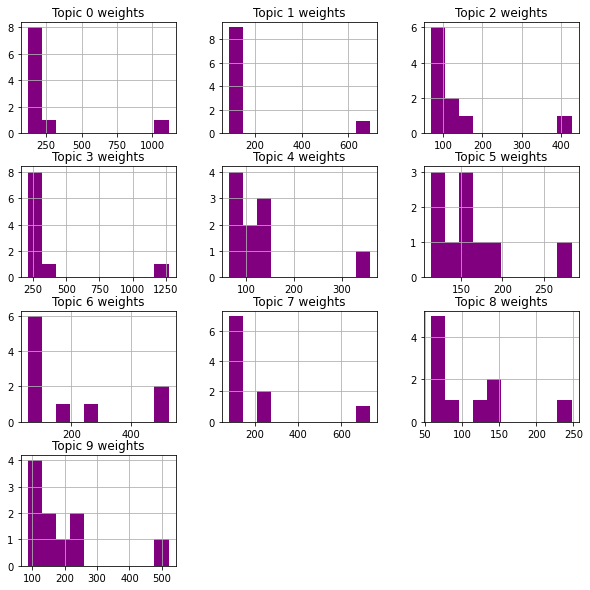

In [14]:
import matplotlib.pyplot as plt
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]
for i in columns_list:
  result[i] = pd.to_numeric(result[i])
result.hist(figsize=(10,10),color = 'Purple')
plt.show(block=False)

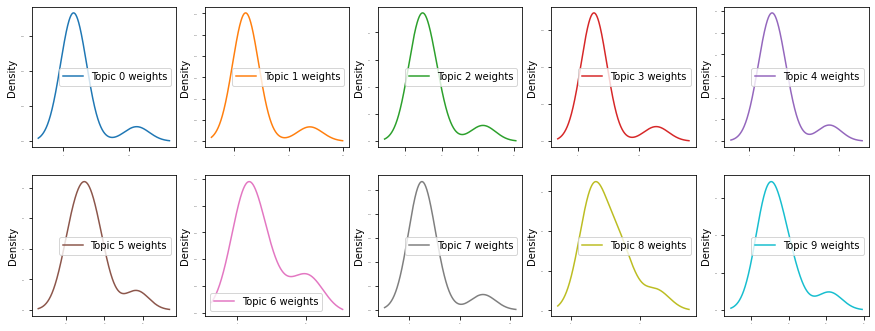

In [15]:
result.plot(kind='density', subplots=True,layout = (5,5),sharex=False, legend=True, fontsize=1,figsize=(15,15))
plt.show(block=False)

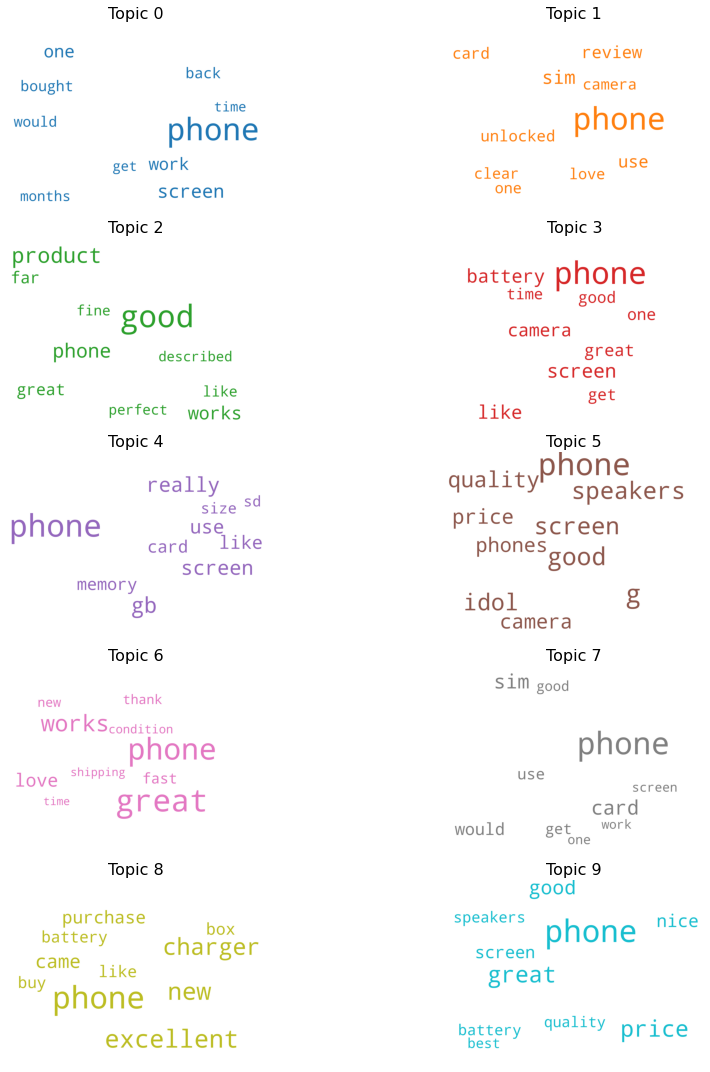

In [16]:
# Wordcloud of Top N words in each topic
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
my_stopwords = nltk.corpus.stopwords.words('english')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

columns_list = ["Topic "+str(i)+" words" for i in range(0,10)]
topics = list()

for i in columns_list:
  topics.append(result[i].values)

frequencies = list()
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]

for i in columns_list:
  frequencies.append(result[i].values)


fig, axes = plt.subplots(5,2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    size_of_array = len(topics[i])
    topic_words = dict()
    for j in range(size_of_array):
      topic_words[topics[i][j]] = frequencies[i][j]
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**LSA TOPIC MODELLING**

In [17]:
import AlgorithmLSA as lsa
lsa_result=lsa.LSA_MODEL(tf,vectorizer)
lsa_result

,Topic 0,Topic 0 weights,Topic 1,Topic 1 weights,Topic 2,Topic 2 weights,Topic 3,Topic 3 weights,Topic 4,Topic 4 weights,Topic 5,Topic 5 weights,Topic 6,Topic 6 weights,Topic 7,Topic 7 weights,Topic 8,Topic 8 weights,Topic 9,Topic 9 weights,Topic 10,Topic 10 weights,Topic 11,Topic 11 weights,Topic 12,Topic 12 weights,Topic 13,Topic 13 weights,Topic 14,Topic 14 weights,Topic 15,Topic 15 weights,Topic 16,Topic 16 weights,Topic 17,Topic 17 weights,Topic 18,Topic 18 weights,Topic 19,Topic 19 weights
0,phone,0.799608,camera,0.294274,sim,0.405512,good,0.489351,g,0.191206,g,0.317534,camera,0.279278,great,0.226899,camera,0.287840,iphone,0.343841,g,0.290069,camera,0.367903,camera,0.298141,really,0.462664,would,0.337932,phones,0.337402,well,0.250614,would,0.334223,quality,0.334809,quality,0.355324
1,screen,0.152154,like,0.272170,card,0.356307,quality,0.252647,like,0.189747,battery,0.205550,idol,0.180955,like,0.157012,battery,0.264889,card,0.239435,card,0.204109,like,0.145245,would,0.210346,idol,0.248390,work,0.195231,sim,0.200095,work,0.244809,better,0.218368,new,0.196427,work,0.203358
2,good,0.136499,screen,0.230298,use,0.203435,g,0.173337,good,0.167214,data,0.174832,sound,0.169881,works,0.153916,use,0.235222,idol,0.204030,gb,0.194512,data,0.118742,get,0.193951,get,0.189328,back,0.190065,card,0.169670,works,0.184099,quality,0.181865,call,0.175584,android,0.166757
3,like,0.135498,good,0.212457,great,0.188922,price,0.172225,sim,0.125272,time,0.160599,one,0.143860,battery,0.121348,good,0.153565,battery,0.200006,moto,0.147821,time,0.108764,back,0.151330,good,0.176243,like,0.188971,price,0.157294,get,0.178757,app,0.153821,love,0.126357,also,0.141088
4,one,0.126485,quality,0.158969,unlocked,0.164001,moto,0.133640,card,0.108498,wifi,0.144458,feature,0.139578,work,0.101139,life,0.117244,good,0.196978,idol,0.147113,alcatel,0.098513,apps,0.148706,alcatel,0.145667,get,0.165139,video,0.140145,apps,0.152145,use,0.149203,speakers,0.121781,screen,0.137921
5,camera,0.117522,idol,0.150509,like,0.135857,great,0.114251,one,0.101663,alcatel,0.137581,smartphone,0.117029,well,0.101068,phone,0.091672,sim,0.176244,speakers,0.118434,get,0.097481,app,0.142844,card,0.142155,device,0.117820,mobile,0.134352,much,0.136273,work,0.121211,sound,0.120733,great,0.131381
6,great,0.107858,one,0.149198,works,0.129052,display,0.112265,android,0.085161,idol,0.127240,like,0.105642,use,0.095785,smartphone,0.083104,life,0.119977,better,0.112862,gb,0.093367,front,0.142331,sim,0.118122,idol,0.115157,button,0.129478,one,0.125570,review,0.105221,alcatel,0.120527,feature,0.110131


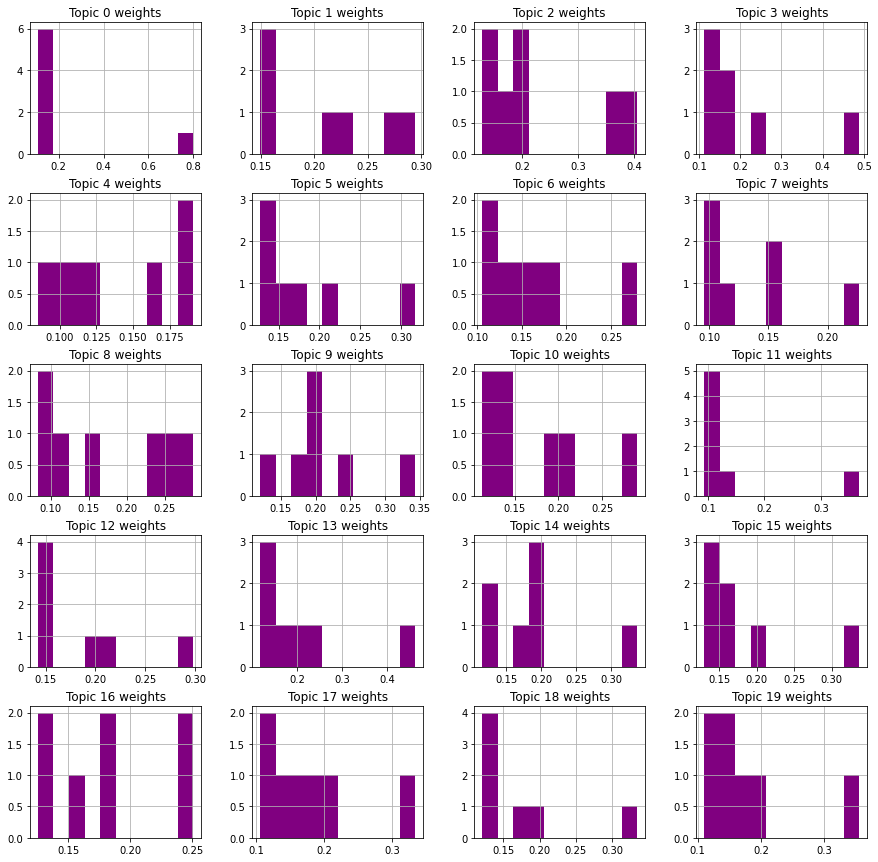

In [18]:
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]
for i in columns_list:
  lsa_result[i] = pd.to_numeric(lsa_result[i])
lsa_result.hist(figsize=(15,15),color = 'purple')
plt.show(block=False)

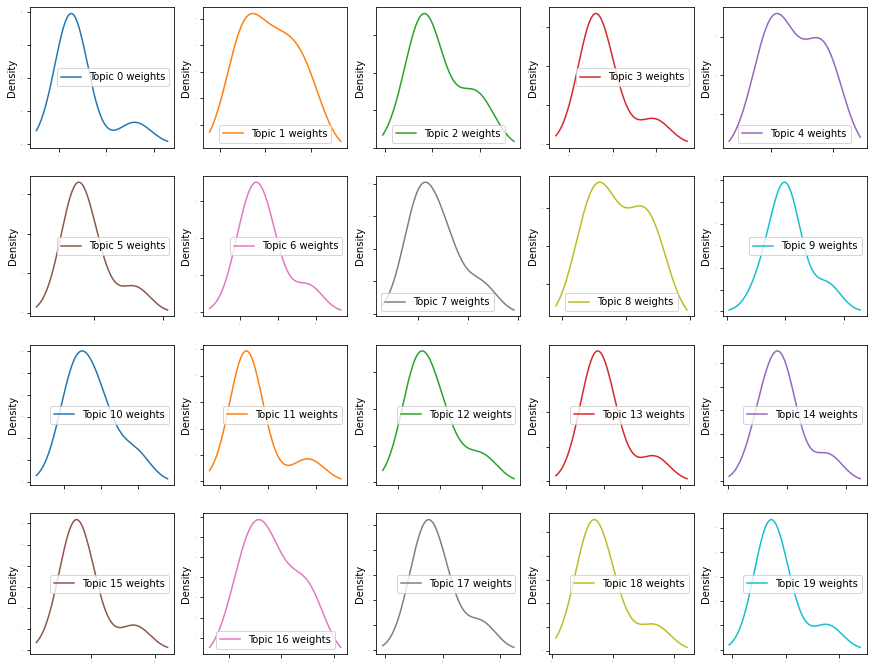

In [19]:
lsa_result.plot(kind='density', subplots=True,layout = (5,5),sharex=False, legend=True, fontsize=1,figsize=(15,15))
plt.show(block=False)

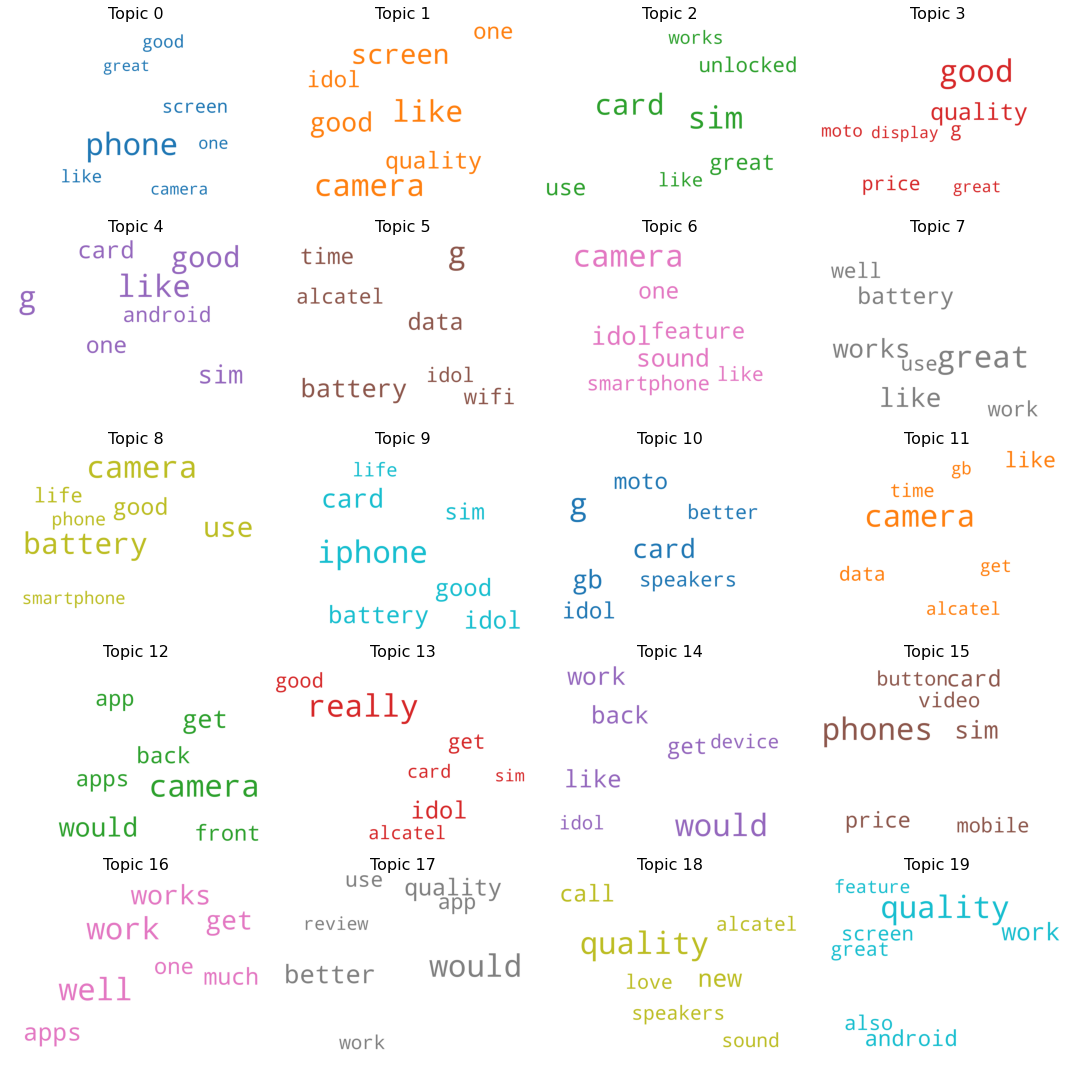

In [20]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols = cols*2
cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

columns_list = ["Topic "+str(i) for i in range(0,20)]
topics = list()

for i in columns_list:
  topics.append(lsa_result[i].values)

frequencies = list()
columns_list = ["Topic "+str(i)+" weights" for i in range(0,20)]

for i in columns_list:
  frequencies.append(lsa_result[i].values)


fig, axes = plt.subplots(5,4, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    size_of_array = len(topics[i])
    topic_words = dict()
    for j in range(size_of_array):
      topic_words[topics[i][j]] = frequencies[i][j]
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**LLDA TOPIC MODELLING**

In [21]:
import AlgorithmLLDA as llda

import numpy as np
required_df = input_df[["cleaned_data","labels"]].head(2000)

In [22]:
required_columns = np.unique(required_df.labels.values)

In [23]:
required_df.shape

(2000, 2)

In [24]:
required_list = list()
for i in required_df.values:
  res = tuple()
  res = res + (i[0],)
  res = res + ([i[1]],)
  required_list.append(res)

In [25]:
llda_model = llda.LldaModel(labeled_documents=required_list, alpha_vector=0.01)

In [26]:
arrayof_labels = input_df["cleaned_data"].values[2000:]

In [27]:
len(arrayof_labels)

1422

In [32]:
(np.unique(required_df.labels.values))

array(['acer', 'aeku', 'alcatel', 'cedar tree technologies', 'e passion',
       'elephone', 'htm', 'huawei', 'indigi', 'jethro', 'jiuhe', 'juning',
       'lenovo', 'nokia', 'otterbox', 'phone baby', 'plum', 'samsung',
       'ulefone', 'vkworld'], dtype=object)

In [34]:
df = pd.DataFrame()
df["Reviews"]= arrayof_labels
acer = list()
aeku = list()
alcatel = list()
cedar_tree_technologies = list()
e_passion = list()
elephone = list()
htm = list()
huawei = list()
indigi = list()
jethro = list()
jiuhe = list()
juning = list()
lenovo = list()
nokia = list()
otterbox = list()
phone_baby = list()
plum = list()
samsung = list()
ulefone = list()
vkworld = list()
for i in arrayof_labels:
  topics = llda_model.inference(document=i, iteration=100, times=10)
  for j in topics:
    if(j[0]=="acer"):
      acer.append(j[1])
    elif(j[0]=="aeku"):
      aeku.append(j[1])
    elif(j[0]=="alcatel"):
      alcatel.append(j[1])
    elif(j[0]=="cedar tree technologies"):
      cedar_tree_technologies.append(j[1])
    elif(j[0]=="e passion"):
      e_passion.append(j[1])
    elif(j[0]=="elephone"):
      elephone.append(j[1])
    elif(j[0]=="htm"):
      htm.append(j[1])
    elif(j[0]=="huawei"):
      huawei.append(j[1])
    elif(j[0]=="indigi"):
      indigi.append(j[1])
    elif(j[0]=="jethro"):
      jethro.append(j[1])
    elif(j[0]=="jiuhe"):
      jiuhe.append(j[1])
    elif(j[0]=="juning"):
      juning.append(j[1])
    elif(j[0]=="lenovo"):
      lenovo.append(j[1])
    elif(j[0]=="nokia"):
      nokia.append(j[1])
    elif(j[0]=="otterbox"):
      otterbox.append(j[1])
    elif(j[0]=="phone baby"):
      phone_baby.append(j[1])
    elif(j[0]=="plum"):
      plum.append(j[1])
    elif(j[0]=="samsung"):
      samsung.append(j[1])
    elif(j[0]=="ulefone"):
      samsung.append(j[1])
    else:
      vkworld.append(j[1])

In [38]:
def create_a_dataframe(df,column_name,listname):
  df[column_name] = listname
  return df

In [39]:
for j in required_columns:
    res = list()
    if(j[0]=="acer"):
     res=acer 
    elif(j[0]=="aeku"):
      res=aeku 
    elif(j[0]=="alcatel"):
      res=alcatel 
    elif(j[0]=="cedar tree technologies"):
      res=cedar_tree_technologies 
    elif(j[0]=="e passion"):
      res=e_passion 
    elif(j[0]=="elephone"):
      res=elephone 
    elif(j[0]=="htm"):
      res=htm 
    elif(j[0]=="huawei"):
      res=huawei 
    elif(j[0]=="indigi"):
      res=indigi 
    elif(j[0]=="jethro"):
      res=jethro 
    elif(j[0]=="jiuhe"):
      res=jiuhe 
    elif(j[0]=="juning"):
      res=juning 
    elif(j[0]=="lenovo"):
      res=lenovo 
    elif(j[0]=="nokia"):
      res=nokia 
    elif(j[0]=="otterbox"):
      res=otterbox 
    elif(j[0]=="phone baby"):
      res=phone_baby 
    elif(j[0]=="plum"):
      res=plum 
    elif(j[0]=="samsung"):
      res=samsung 
    elif(j[0]=="ulefone"):
      res=samsung 
    else:
      res=vkworld 
    df = create_a_dataframe(df, j, res[:1422])

In [40]:
df.head(5)

,Reviews,acer,aeku,alcatel,cedar tree technologies,e passion,elephone,htm,huawei,indigi,jethro,jiuhe,juning,lenovo,nokia,otterbox,phone baby,plum,samsung,ulefone,vkworld
0,love marvelous quickly smart everithing,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375
1,phone received model number aalus meets descri...,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375,0.002375
2,disappointing overall unlocked phone says vene...,0.433176,0.433176,0.433176,0.433176,0.433176,0.433176,0.433176,0.433176,0.433176,0.433176,0.433176,0.433176,0.433176,0.433176,0.433176,0.433176,0.433176,0.433176,0.433176,0.433176
3,like alcatel onetouch pixi inch cell phone siz...,0.000110,0.000110,0.000110,0.000110,0.000110,0.000110,0.000110,0.000110,0.000110,0.000110,0.000110,0.000110,0.000110,0.000110,0.000110,0.000110,0.000110,0.000110,0.000110,0.000110
4,good cell phone like description unlocked digi...,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918


**HMM-LDA TOPIC MODELLING**

In [44]:
import AlgorithmHMMLDA as HMMLDA
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [45]:
def get_reuters_token_list_by_sentence(num_doc,ip):
    corpus = [[i.split() for i in ip ]]
    print(corpus)
    valid_voca = set(w.lower() for w in nltk.corpus.words.words())
    stop = stopwords.words('english')
    valid_voca = valid_voca.union(stop)

    tmp_corpus = list()
    voca_dic = dict()
    voca = list()
    for doc in corpus:
        tmp_doc = list()
        for sent in doc:
            tmp_sent = list()
            for word in sent:
                if word in valid_voca:
                    tmp_sent.append(word)
                    if word not in voca_dic:
                        voca_dic[word] = len(voca_dic)
                        voca.append(word)
            if len(tmp_sent) > 0:
                tmp_doc.append(tmp_sent)
        if len(tmp_doc) > 0:
            tmp_corpus.append(tmp_doc)

    # convert token list to word index list
    corpus = list()
    for doc in tmp_corpus:
        new_doc = list()
        for sent in doc:
            new_sent = list()
            for word in sent:
                new_sent.append(voca_dic[word])
            new_doc.append(new_sent)
        corpus.append(new_doc)

    return np.array(voca), corpus

In [46]:
n_docs = 1000
voca, corpus = get_reuters_token_list_by_sentence(n_docs,input_df["cleaned_data"].values)

[[['feel', 'lucky', 'found', 'used', 'phone', 'us', 'used', 'hard', 'phone', 'line', 'someone', 'upgraded', 'sold', 'one', 'son', 'liked', 'old', 'one', 'finally', 'fell', 'apart', 'years', 'want', 'upgrade', 'thank', 'seller', 'really', 'appreciate', 'honesty', 'said', 'used', 'phone', 'recommend', 'seller', 'highly', 'would'], ['nice', 'phone', 'nice', 'grade', 'pantach', 'revue', 'clean', 'set', 'easy', 'set', 'never', 'android', 'phone', 'fantastic', 'say', 'least', 'perfect', 'size', 'surfing', 'social', 'media', 'great', 'phone', 'samsung'], ['pleased'], ['works', 'good', 'goes', 'slow', 'sometimes', 'good', 'phone', 'love'], ['great', 'phone', 'replace', 'lost', 'phone', 'thing', 'volume', 'button', 'work', 'still', 'go', 'settings', 'adjust', 'job', 'eligible', 'upgrade', 'phone', 'thaanks'], ['already', 'phone', 'problems', 'know', 'stated', 'used', 'dang', 'state', 'charge', 'wish', 'would', 'read', 'comments', 'would', 'purchased', 'item', 'cracked', 'side', 'damaged', 'good

In [47]:
n_voca = len(voca)
n_topic = 20
n_class = 20
max_iter = 100
model = HMMLDA.HMM_LDA(len(corpus), n_voca, n_topic, n_class, alpha=0.1, beta=0.1, gamma=0.1, eta=0.1, verbose=False)
model.fit(corpus, max_iter=max_iter)

In [48]:
def get_top_words(topic_word_matrix, vocab, topic, n_words=20):
    if not isinstance(vocab, np.ndarray):
        vocab = np.array(vocab)
    top_words = vocab[topic_word_matrix[topic].argsort()[::-1][:n_words]]
    return top_words

In [49]:
for ti in range(n_topic):
    top_words = get_top_words(model.TW, voca, ti, n_words=10)
    print('Topic', ti ,': ', ','.join(top_words))

Topic 0 :  phone,vendor,ship,happen,yeah,amazon,price,made,came,two
Topic 1 :  feel,everything,elderly,trusty,working,point,outright,try,sporadically,shut
Topic 2 :  didnt,ram,bit,much,star,condition,screen,sticker,happy,top
Topic 3 :  like,use,steal,model,within,pile,next,day,card,open
Topic 4 :  feel,front,ask,find,provide,make,available,ugly,warm,anything
Topic 5 :  phone,family,working,use,feature,lollipop,expensive,deal,x,could
Topic 6 :  phone,feel,minimal,apple,happy,low,amazon,multiple,regardless,far
Topic 7 :  didnt,reading,search,mostly,people,happy,far,product,overall,two
Topic 8 :  phone,also,anyone,listed,amazon,may,surface,far,product,home
Topic 9 :  feel,type,incremental,pretty,appearance,big,respond,keep,functionality,sim
Topic 10 :  phone,wallpaper,turn,often,pocket,lot,design,company,mention,make
Topic 11 :  bought,point,first,cord,actually,use,alternate,considering,could,end
Topic 12 :  phone,feel,bass,positive,sleep,full,big,though,support,cardboard
Topic 13 :  phon

**Supervised LDA TOPIC MODELLING**

In [ ]:
!pip install pymc

In [51]:
training_data = input_df['cleaned_data'].values

In [52]:
import nltk
from nltk import word_tokenize
from nltk.corpus import reuters, stopwords
from six.moves import xrange
from collections import Counter
nltk.download('words')

def get_ids_cnt(corpus, max_voca=9999999, remove_top_n=5):
    voca = set(w.lower() for w in nltk.corpus.words.words())
    stop = stopwords.words('english')

    docs = list()
    freq = Counter()

    for doc in corpus:
        if isinstance(doc, str):
            doc = word_tokenize(doc)
        elif not hasattr(doc, '__iter__'):
            raise Exception('Corpus is not a list of string or token list')

        # remove word using stopword list or single character word
        doc = [word.lower() for word in doc if word.lower() in voca and word.lower() not in stop and len(word) != 1]
        freq.update(doc)
        docs.append(doc)

    voca = [key for iter, (key, val) in enumerate(freq.most_common(max_voca)) if iter >= remove_top_n]

    voca_dic = dict()
    voca_list = list()
    for word in voca:
        voca_dic[word] = len(voca_dic)
        voca_list.append(word)

    doc_ids = list()
    doc_cnt = list()

    for doc in docs:
        words = set(doc)
        ids = np.array([int(voca_dic[word]) for word in words if word in voca_dic])
        cnt = np.array([int(doc.count(word)) for word in words if word in voca_dic])

        doc_ids.append(ids)
        doc_cnt.append(cnt)

    return np.array(voca_list), doc_ids, doc_cnt

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [53]:
voca, word_ids, word_cnt = get_ids_cnt(training_data)

In [54]:
def convert_cnt_to_list(word_ids, word_cnt):
    corpus = list()

    for di in xrange(len(word_ids)):
        doc = list()
        doc_ids = word_ids[di]
        doc_cnt = word_cnt[di]
        for wi in xrange(len(doc_ids)):
            word_id = doc_ids[wi]
            for si in xrange(doc_cnt[wi]):
                doc.append(word_id)
        corpus.append(doc)
    return corpus

In [55]:
corpus = convert_cnt_to_list(word_ids, word_cnt)

In [56]:
import AlgorithmsupervisedLDA as slda

In [57]:
n_doc = len(corpus)
n_voca = voca.size

In [58]:
n_doc

3422

In [60]:
import random
#fit artificial sevearity
sevearity = [random.randint(0,5) for i in range(0,3422)]

In [61]:
model = slda.SupervisedLDA(n_doc, n_voca, 10, sigma=0.01)
model.fit(corpus, sevearity)

In [62]:
for ti in model.eta.argsort():
    top_words = get_top_words(model.TW, voca, ti, n_words=10)
    print('Eta', model.eta[ti] ,'\nTopic', ti ,':\t', ','.join(top_words))

Eta -5.6446115129170185 
Topic 7 :	 camera,use,like,android,get,even,battery,would,quality,well
Eta -2.345850686933045 
Topic 3 :	 works,new,price,bought,time,came,love,problem,would,work
Eta -0.266293198713137 
Topic 5 :	 sim,use,card,work,well,love,works,really,like,mobile
Eta 1.7133347744902123 
Topic 1 :	 get,even,cell,never,works,two,battery,got,would,price
Eta 3.3682533089874314 
Topic 6 :	 new,work,charger,purchase,return,amazon,got,charging,battery,works
Eta 3.718095185326482 
Topic 2 :	 price,best,nice,like,battery,camera,day,really,better,low
Eta 4.201023092928003 
Topic 9 :	 get,call,buy,money,work,customer,mobile,send,without,time
Eta 5.733902867765223 
Topic 0 :	 works,new,product,price,like,excellent,buy,review,love,unlocked
Eta 6.22670120390316 
Topic 8 :	 sim,would,card,got,work,another,old,working,store,took
Eta 7.651637543646991 
Topic 4 :	 battery,use,camera,like,sound,really,android,front,price,get


**Bi-Term TOPIC MODELLING**

In [ ]:
!pip install biterm

In [ ]:
import sys
sys.path.insert(1,'/content/')
import AlgorithmBITERM as btm_model
topics = btm_model.BITERM_MODEL(tf,vectorizer)

 25%|██▌       | 25/100 [46:49<2:20:32, 112.43s/it]

In [ ]:
topics

In [ ]:
texts= input_df['cleaned_data'].values
for i in range(len(texts)):
        print("{} (topic: {})".format(texts[i], topics[i].argmax()))